# Data Visualization and Prep:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report
rcParams['figure.figsize'] = 10,5

In [7]:
df = pd.read_csv('/content/diabetes - diabetes.csv')
df = df.drop('UserID',axis = 1)
print(df.tail(),'\n')
print(df.head(),'\n')
print(df.info(),'\n')
print(df.describe())

     Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0   

   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   



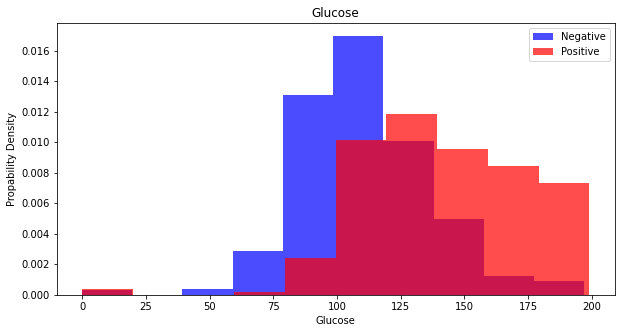

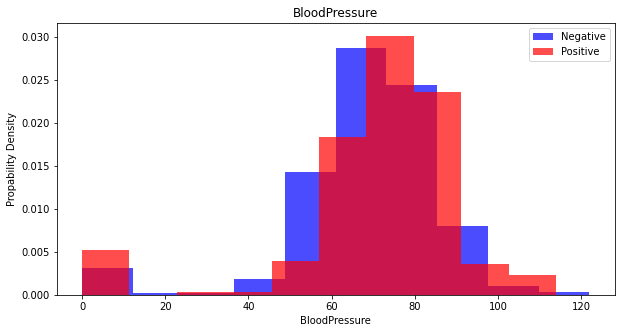

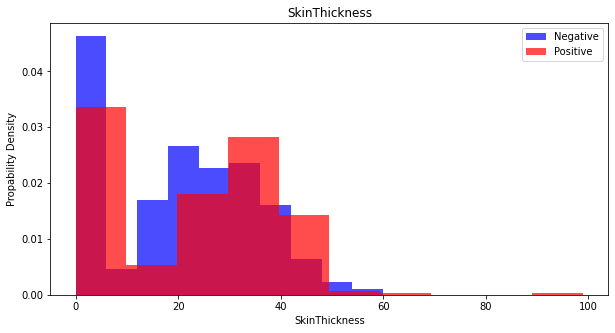

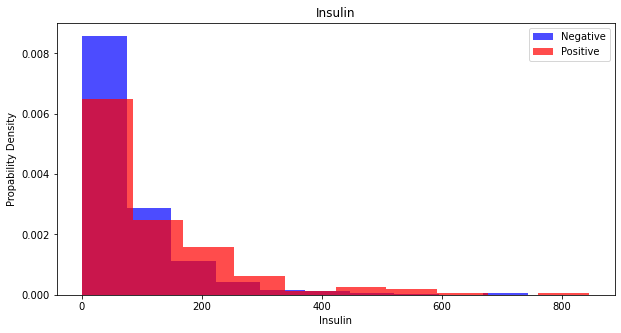

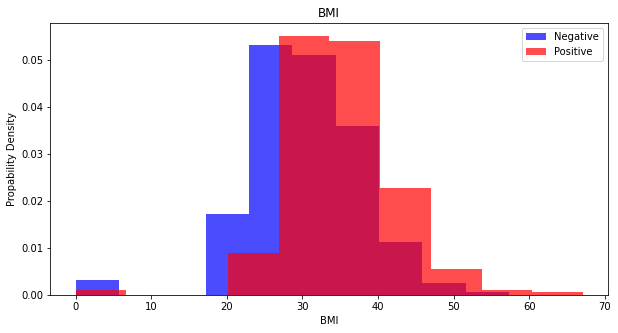

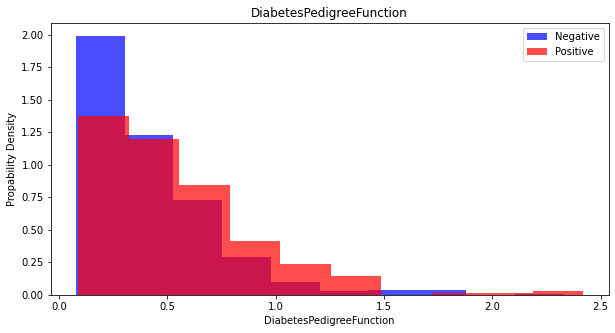

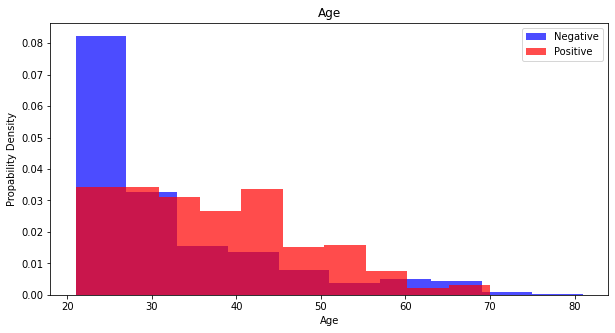

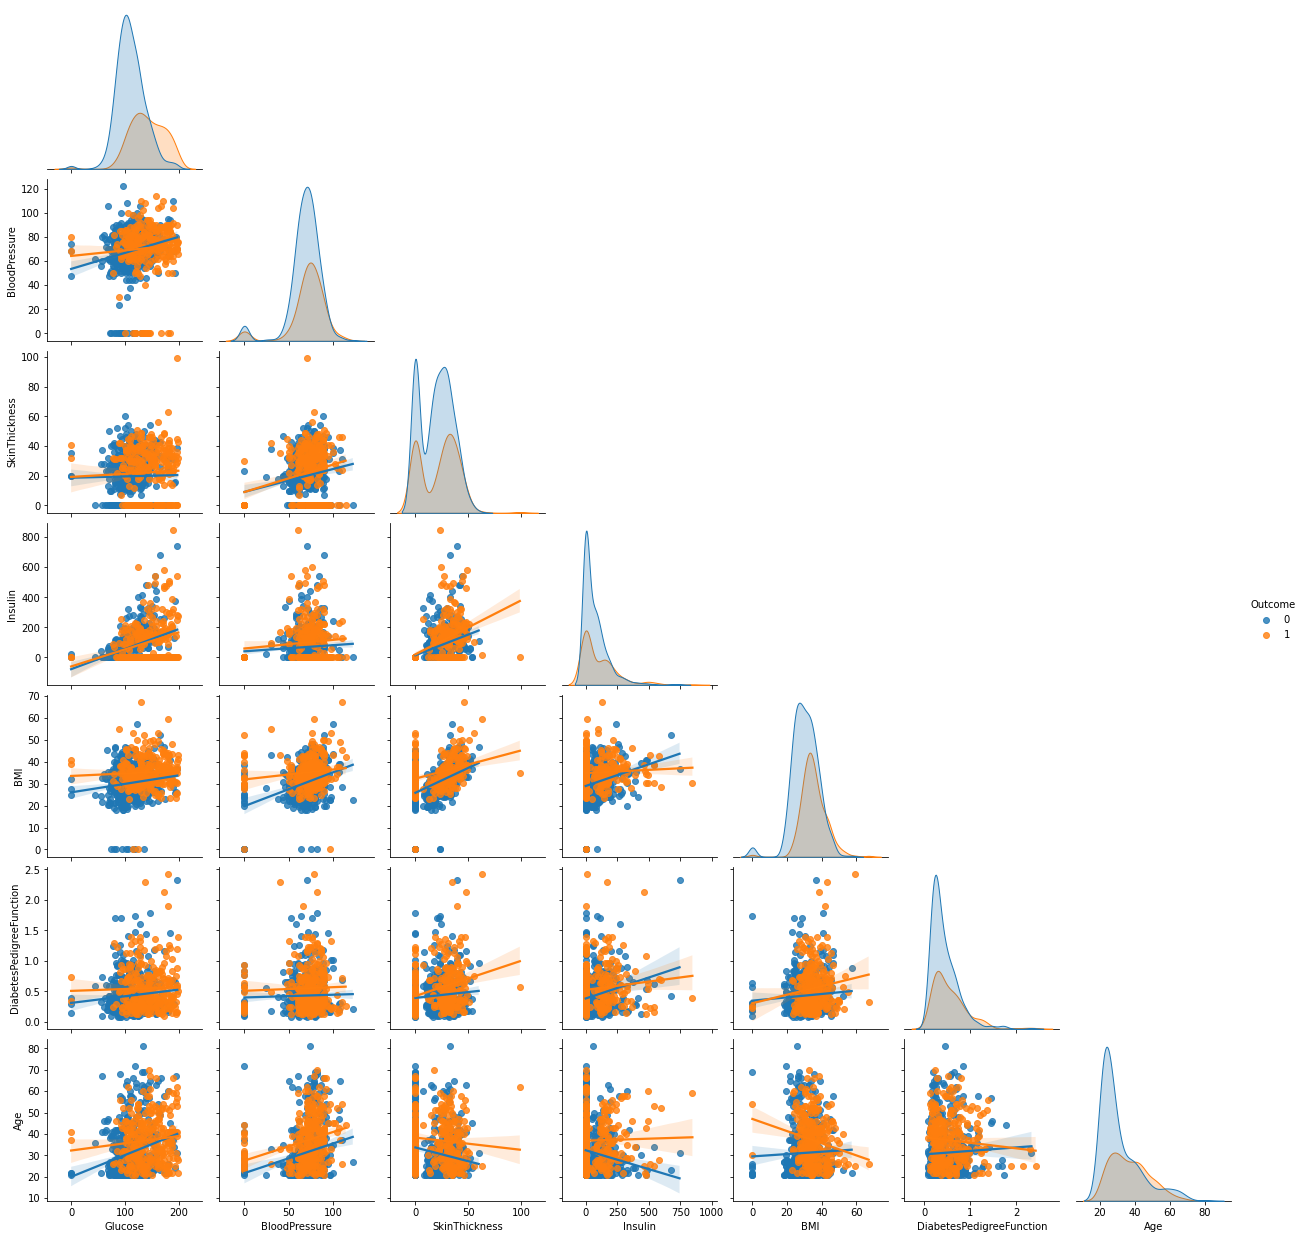

In [10]:
for label in df.columns[:-1]:
  plt.hist(df[df['Outcome'] == 0][label], color = 'blue', alpha = 0.7, density = True, label = 'Negative')
  plt.hist(df[df['Outcome'] == 1][label], color = 'red', alpha = 0.7, density = True, label = 'Positive')
  plt.xlabel(label)
  plt.ylabel('Propability Density')
  plt.title(label)
  plt.legend()
  plt.show()
  print('\n')

sns.pairplot(df, hue="Outcome", corner=True, kind='reg')

In [105]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
# I'm Normalizing feature values before analysis:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x)
# Over sampling the data before analysis:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler()
# x, y = ros.fit_resample(x,y)

[[0.74371859 0.59016393 0.35353535 ... 0.50074516 0.23441503 0.48333333]
 [0.42713568 0.54098361 0.29292929 ... 0.39642325 0.11656704 0.16666667]
 [0.91959799 0.52459016 0.         ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.6080402  0.59016393 0.23232323 ... 0.390462   0.07130658 0.15      ]
 [0.63316583 0.49180328 0.         ... 0.4485842  0.11571307 0.43333333]
 [0.46733668 0.57377049 0.31313131 ... 0.45305514 0.10119556 0.03333333]]


In [106]:
x_train, x_test = np.split(x, [int(0.8*len(x))])
y_train, y_test = np.split(y, [int(0.8*len(y))])
print(y_train.shape, x_train.shape)
print(y_test.shape, x_test.shape)

(614,) (614, 7)
(154,) (154, 7)


# K-NN:

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



# Logistic Regression:

In [118]:
from sklearn.linear_model import LogisticRegressionCV
LR = LogisticRegressionCV()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.77      0.55      0.64        55

    accuracy                           0.78       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



# Naive Bayes:

In [127]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

In [128]:
print(classification_report(y_test, y_pred))
# In my opinion, Naive Bayes is not the best model to use in this case, since the model assumes that all the features in the dataset are independent, which is not true.
# For example, Johns Hopkins Medicine states that "high blood pressure is twice as likely to strike a person with diabetes than a person without diabetes.

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        99
           1       0.67      0.51      0.58        55

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



# Support Vector Machines:

## SVC

In [129]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.76      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



## Linear SVC

In [131]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
# Another way is by using:
# from sklearn.svm import SVC
# svc = SVC(kernel = 'linear')
# svc.fit(x_train,y_train)
# y_pred = svc.predict(x_test)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.76      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



# Neural Network

In [133]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
  ax1.plot(history.history['loss'], color = 'blue',label='loss')
  ax1.plot(history.history['val_loss'], color = 'yellow', label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.grid(True)
  ax1.legend()

  ax2.plot(history.history['accuracy'], color = 'red',label='accuracy')
  ax2.plot(history.history['val_accuracy'], color = 'green', label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()
  plt.show()

In [165]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu',input_shape=(7,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])
  # The last layer is just reflecting the predictions to either 0, or 1, and this will help us classify the outcomes.
  nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                  metrics='accuracy')
  history = nn_model.fit(
    x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0 
    )
  return nn_model, history
# "validation_split" is used to split the training data and have aportion of the data that is used for validation during the training by Tesnorflow.
# "verbose" is set to zero to prevent the model from printing any thing.

32 nodes, dropout 0, lr 0.001, batch size 8


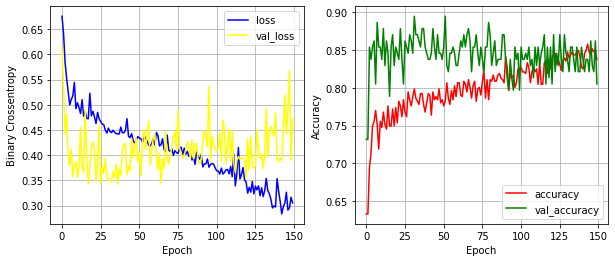

5/5 [==============================] - 0s 3ms/step - loss: 1.3966 - accuracy: 0.7338
32 nodes, dropout 0.2, lr 0.001, batch size 8


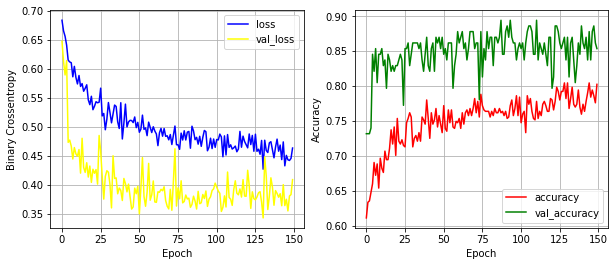

5/5 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7857


In [166]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 150
for num_nodes in [32]:
  for dropout_prob in [0, 0.2]:
    for lr in  [0.001]:
      for batch_size in [8]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss  = model.evaluate(x_test,y_test)[0]
        if val_loss < least_val_loss:
          least_val_loss =  val_loss
          least_loss_model = model

In [167]:
print(least_loss_model.summary())
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

# The outputs are either so close to zero, or so close to one since we used sigmoid function to represent the outcome.

Model: "sequential_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_480 (Dense)           (None, 32)                256       
                                                                 
 dropout_324 (Dropout)       (None, 32)                0         
                                                                 
 dense_481 (Dense)           (None, 32)                1056      
                                                                 
 dropout_325 (Dropout)       (None, 32)                0         
                                                                 
 dense_482 (Dense)           (None, 32)                1056      
                                                                 
 dropout_326 (Dropout)       (None, 32)                0         
                                                                 
 dense_483 (Dense)           (None, 32)             

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

